In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
data=pd.read_csv("/content/Social_Network_Ads.csv")
data.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [26]:
data.shape

(400, 5)

In [27]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [28]:
data["Purchased"].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [29]:
data.drop("User ID",axis=1,inplace=True)

In [30]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

In [31]:
data.duplicated().sum()

20

In [32]:
data_no_duplicates = data.drop_duplicates()
print(data_no_duplicates)

     Gender  Age  EstimatedSalary  Purchased
0      Male   19            19000          0
1      Male   35            20000          0
2    Female   26            43000          0
3    Female   27            57000          0
4      Male   19            76000          0
..      ...  ...              ...        ...
395  Female   46            41000          1
396    Male   51            23000          1
397  Female   50            20000          1
398    Male   36            33000          0
399  Female   49            36000          1

[380 rows x 4 columns]


In [33]:
data_no_duplicates.duplicated().sum()

0

In [34]:
data_no_duplicates.isna()

,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
395,False,False,False,False
396,False,False,False,False
397,False,False,False,False
398,False,False,False,False


In [35]:
data_no_duplicates.isna().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [36]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler

# create label encoding
label_encoder= LabelEncoder()
data_no_duplicates['Gender']=label_encoder.fit_transform(data_no_duplicates['Gender'])
data_no_duplicates

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [37]:

y=data_no_duplicates["Purchased"]
x=data_no_duplicates.drop("Purchased",axis=1)

Spliting

In [38]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((304, 3), (76, 3), (304,), (76,))

Decion Tree Algorithm

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()



In [41]:
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [42]:
y_pred=dt_clf.predict(x_test)

In [43]:
y_pred

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0])

In [44]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score

In [45]:
print("Accuracy " ,accuracy_score(y_test,y_pred))

Accuracy  0.8026315789473685


In [47]:
print("confusion matrix " ,confusion_matrix(y_test,y_pred))

confusion matrix  [[37 11]
 [ 4 24]]


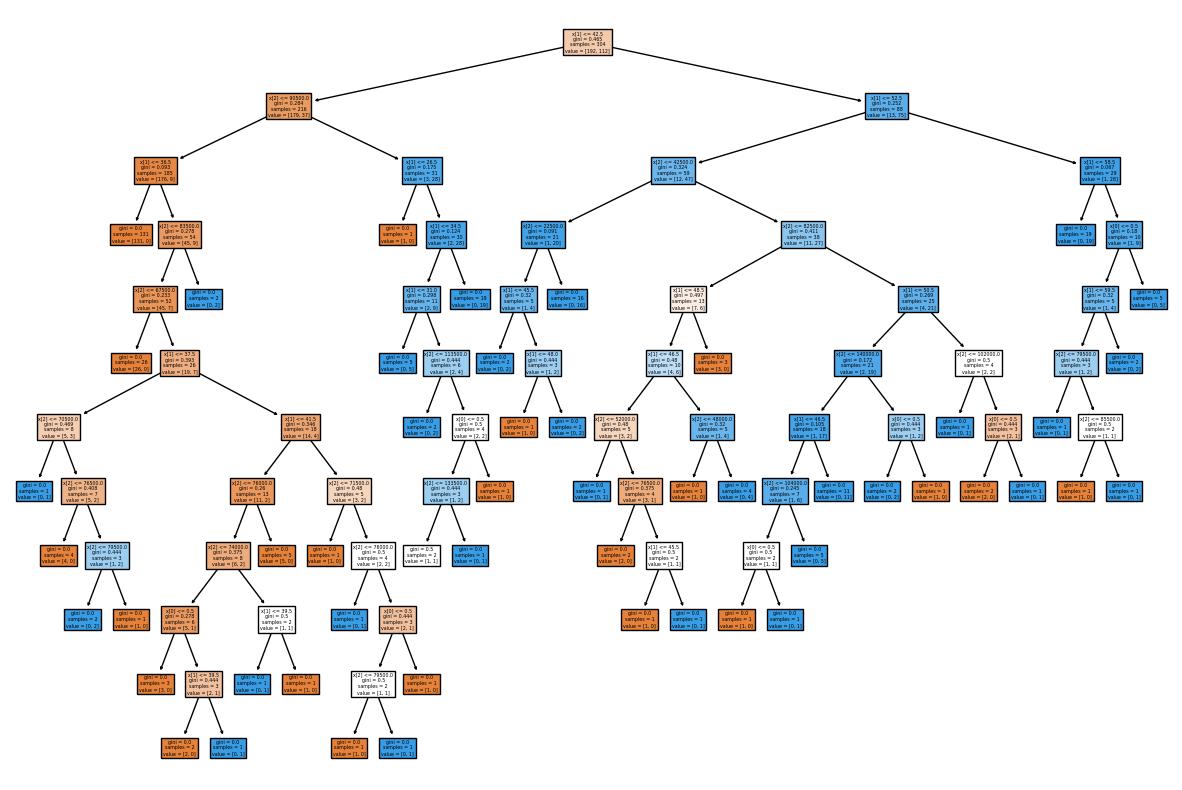

In [46]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt_clf,filled=True)
plt.show()